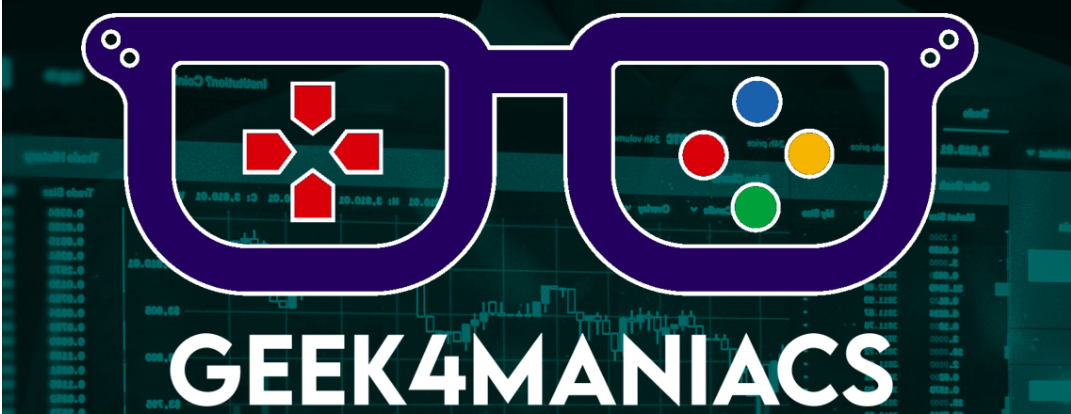
#Vamos a dividir este análisis en partes: obtención de los datos históricos, cálculo de los retornos logarítmicos y sus estadísticas, creación de la simulación de Monte Carlo y análisis de los resultados.

#Asegúrate de tener instalados en tu ambiente Python los paquetes necesarios como pandas, numpy, yfinance, matplotlib y scipy.

#Comenzamos por la importación de las librerías necesarias y la descarga de los datos históricos:

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.stats import norm

# Descargar datos históricos
tickers = ['BTC-USD', 'ETH-USD', 'ADA-USD']  # Bitcoin, Ethereum, Cardano
data = yf.download(tickers, start='2018-07-01', end='2023-07-01')['Close']

# Verificar los datos
print(data.head())


[*********************100%***********************]  3 of 3 completed
             ADA-USD      BTC-USD     ETH-USD
Date                                         
2018-07-01  0.142208  6385.819824  453.917999
2018-07-02  0.158278  6614.180176  475.346985
2018-07-03  0.150655  6529.589844  464.195007
2018-07-04  0.150960  6597.549805  467.317993
2018-07-05  0.148921  6639.140137  474.411987


#A continuación, calculamos los retornos logarítmicos y sus estadísticas:

In [2]:
# Calcular los retornos logarítmicos
log_returns = np.log(data / data.shift(1))

# Calcular la media y la varianza de los retornos
mean_returns = log_returns.mean()
cov_matrix = log_returns.cov()


#Ahora, simulamos las posibles trayectorias de precios para las próximas 252 días (un año de trading):

In [4]:
weights = np.array([1/3, 1/3, 1/3])  # Distribución equitativa en BTC, ETH, ADA



# Configurar la simulación de Monte Carlo
num_simulations = 1000
num_trading_days = 252
initial_investment = 30000

# Crear una matriz vacía para almacenar los resultados de la simulación
results = np.zeros((num_trading_days + 1, num_simulations))

# Inicializar la matriz con el valor de inversión inicial
results[0] = initial_investment

# Crear las simulaciones
for t in range(1, num_trading_days + 1):
    for i in range(num_simulations):
        random_walk = np.random.multivariate_normal(mean_returns, cov_matrix)
        results[t, i] = results[t - 1, i] * (np.sum(weights * np.exp(random_walk)))


#Finalmente, calculamos el VaR al 95% y 99%:

In [5]:
# Calcular el VaR
portfolio_returns = results[-1] / initial_investment - 1
var_95 = np.percentile(portfolio_returns, 5)
var_99 = np.percentile(portfolio_returns, 1)

print(f"El VaR al 95% es {var_95*initial_investment}")
print(f"El VaR al 99% es {var_99*initial_investment}")


El VaR al 95% es -16777.241852000934
El VaR al 99% es -22233.20801411766


#Por supuesto, la visualización de los datos es un componente crucial en la comprensión de nuestros resultados. En primer lugar, podemos visualizar las trayectorias simuladas de los precios del portafolio:

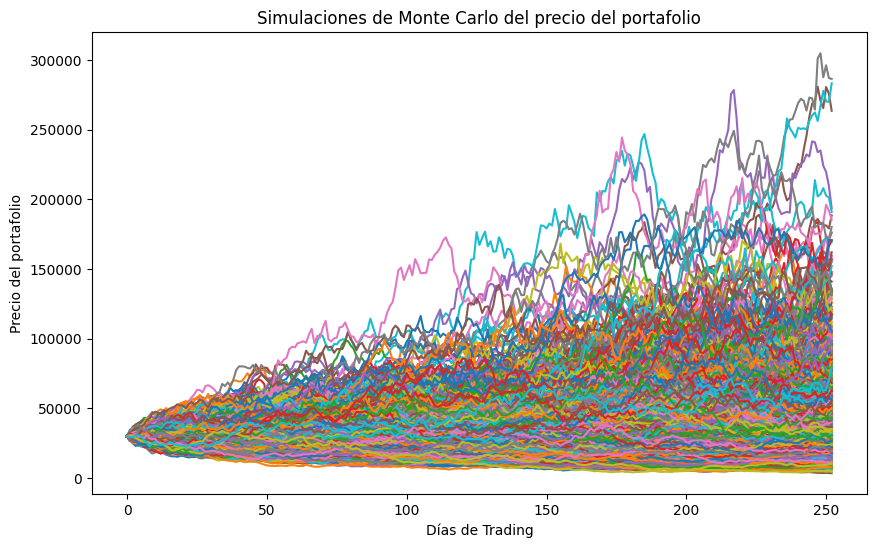

In [6]:
# Graficar las trayectorias simuladas de los precios del portafolio
plt.figure(figsize=(10,6))
plt.plot(results)
plt.title('Simulaciones de Monte Carlo del precio del portafolio')
plt.xlabel('Días de Trading')
plt.ylabel('Precio del portafolio')
plt.show()


#También podemos graficar la distribución de los retornos del portafolio en el último día de simulación para tener una idea de los posibles resultados:

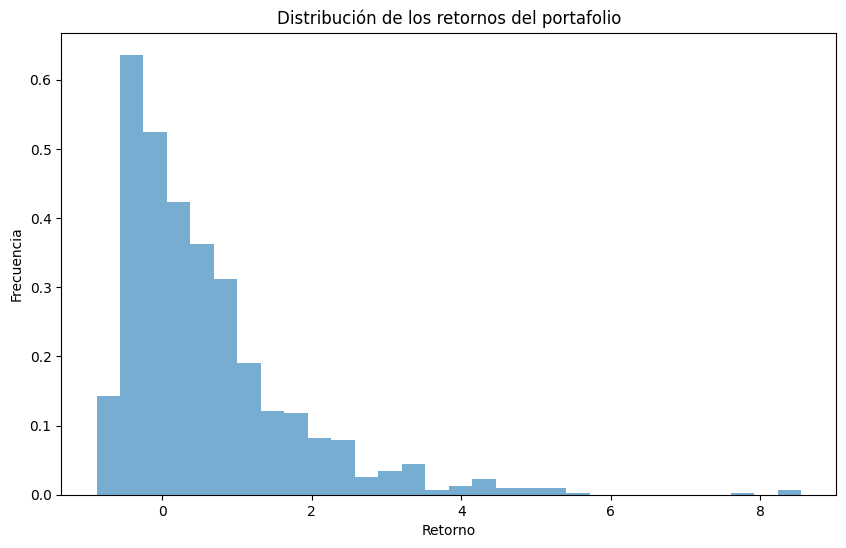

In [7]:
# Calcular los retornos del portafolio
portfolio_returns = results[-1] / initial_investment - 1

# Graficar la distribución de los retornos del portafolio
plt.figure(figsize=(10,6))
plt.hist(portfolio_returns, bins=30, density=True, alpha=0.6)
plt.title('Distribución de los retornos del portafolio')
plt.xlabel('Retorno')
plt.ylabel('Frecuencia')
plt.show()


#Finalmente, podemos graficar los posibles valores del portafolio en el último día de simulación:

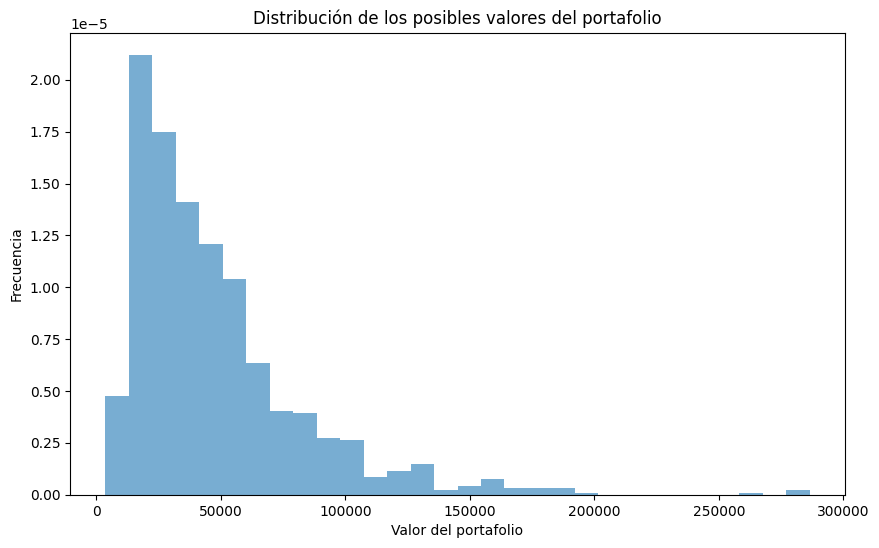

In [8]:
# Graficar los posibles valores del portafolio
plt.figure(figsize=(10,6))
plt.hist(results[-1], bins=30, density=True, alpha=0.6)
plt.title('Distribución de los posibles valores del portafolio')
plt.xlabel('Valor del portafolio')
plt.ylabel('Frecuencia')
plt.show()

#Estos gráficos te dan una buena idea de cómo la simulación de Monte Carlo puede ayudarte a entender los posibles resultados futuros de tu portafolio de criptomonedas. Recuerda siempre que estos son solo escenarios hipotéticos y no garantizan resultados futuros.

#Una forma común de visualizar esto es trazar un histograma de los retornos finales de la cartera y luego marcar el valor más probable. También podemos marcar el valor inicial de la cartera para referencia. Aquí te muestro cómo hacerlo:

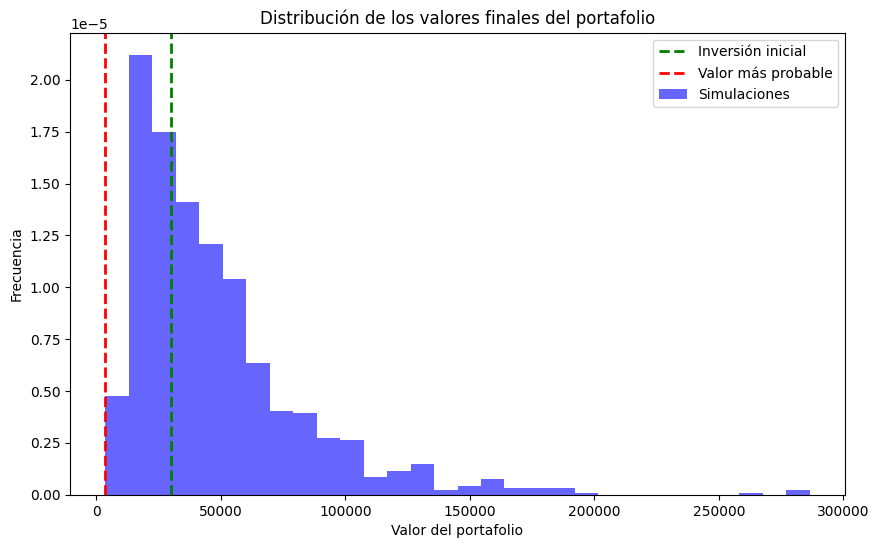

El valor más probable del portafolio después de un año es 3545.90


In [9]:
# Calcular los retornos finales del portafolio
final_portfolio_values = results[-1]

# Calcular el valor más probable
mode = pd.Series(final_portfolio_values).mode()[0]

# Graficar un histograma de los valores finales del portafolio
plt.figure(figsize=(10, 6))
plt.hist(final_portfolio_values, bins=30, density=True, alpha=0.6, color='blue')
plt.axvline(initial_investment, color='green', linestyle='dashed', linewidth=2)
plt.axvline(mode, color='red', linestyle='dashed', linewidth=2)
plt.title('Distribución de los valores finales del portafolio')
plt.xlabel('Valor del portafolio')
plt.ylabel('Frecuencia')
plt.legend(["Inversión inicial", "Valor más probable", "Simulaciones"])
plt.show()

print(f"El valor más probable del portafolio después de un año es {mode:.2f}")


#Este gráfico muestra la distribución de los valores finales del portafolio de las simulaciones de Monte Carlo. La línea verde indica la inversión inicial de 30,000 euros y la línea roja indica el valor más probable del portafolio después de un año según las simulaciones.

#Recuerda que este es un escenario hipotético y la realidad puede ser muy diferente. Los resultados reales pueden variar debido a una serie de factores que las simulaciones de Monte Carlo no pueden captar.

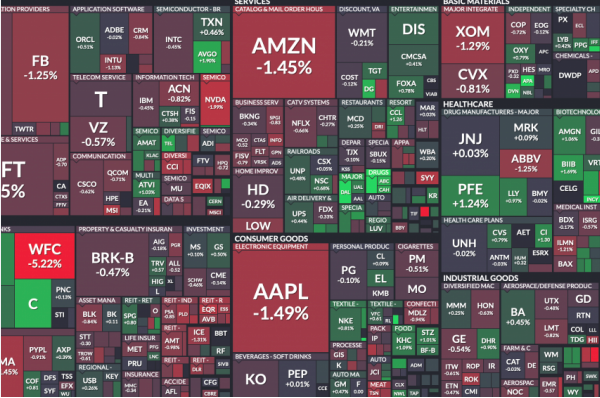

#Ahora vamos a comparar nuestro portafolio de criptomonedas con una inversión más segura como es el índice SP500.

#Primero, necesitamos descargar los datos del precio de cierre del SP500 para el mismo periodo de tiempo:



In [10]:
sp500_data = yf.download('^GSPC', start='2018-07-01', end='2023-07-01')['Close']
sp500_returns = np.log(sp500_data / sp500_data.shift(1))


[*********************100%***********************]  1 of 1 completed


#Luego, debemos realizar una simulación similar a la que hicimos para nuestro portafolio de criptomonedas:

In [11]:
# Configurar la simulación de Monte Carlo para SP500
sp500_results = np.zeros((num_trading_days + 1, num_simulations))

# Inicializar la matriz con el valor de inversión inicial
sp500_results[0] = initial_investment

# Crear las simulaciones
for t in range(1, num_trading_days + 1):
    random_walk = np.random.normal(sp500_returns.mean(), sp500_returns.std(), num_simulations)
    sp500_results[t] = sp500_results[t - 1] * np.exp(random_walk)


#Ahora que tenemos los resultados finales para ambos, podemos comparar la ganancia o pérdida porcentual para cada uno:



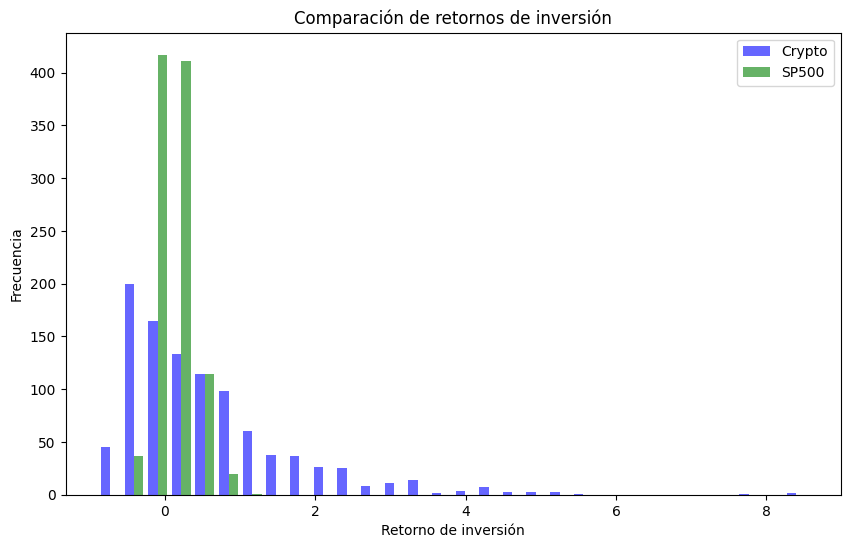

In [12]:
# Calcular los retornos finales para cada portafolio
final_crypto_values = results[-1]
final_sp500_values = sp500_results[-1]

# Calcular la ganancia o pérdida porcentual para cada portafolio
crypto_returns = final_crypto_values / initial_investment - 1
sp500_returns = final_sp500_values / initial_investment - 1

# Graficar la ganancia o pérdida porcentual para cada portafolio
plt.figure(figsize=(10, 6))
plt.hist([crypto_returns, sp500_returns], bins=30, alpha=0.6,
         label=['Crypto', 'SP500'], color=['blue', 'green'])
plt.title('Comparación de retornos de inversión')
plt.xlabel('Retorno de inversión')
plt.ylabel('Frecuencia')
plt.legend(loc='upper right')
plt.show()


#Este gráfico muestra una comparación de los retornos de inversión entre el portafolio de criptomonedas y una inversión en el SP500. Esto debería proporcionarte una idea de cómo se compara la inversión en criptomonedas con una inversión más tradicional en términos de retorno potencial y variabilidad.


#Para calcular los retornos promedio de las simulaciones, podríamos utilizar la media de las distribuciones finales de cada portafolio. Luego, lo convertimos a porcentajes para facilitar la interpretación. Aquí está cómo hacerlo:

In [13]:
# Calcular el retorno promedio para cada portafolio
avg_crypto_return = np.mean(final_crypto_values) / initial_investment - 1
avg_sp500_return = np.mean(final_sp500_values) / initial_investment - 1

# Imprimir los resultados
print(f"El retorno promedio de la inversión en criptomonedas fue de {avg_crypto_return * 100:.2f}%")
print(f"El retorno promedio de la inversión en SP500 fue de {avg_sp500_return * 100:.2f}%")


El retorno promedio de la inversión en criptomonedas fue de 58.07%
El retorno promedio de la inversión en SP500 fue de 11.43%


#Este código imprimirá los retornos promedios de la inversión en criptomonedas y en SP500 como porcentajes.

#Ten en cuenta que estos son los retornos promedios de las simulaciones, no los retornos reales. Los retornos reales pueden variar debido a una serie de factores que las simulaciones de Monte Carlo no pueden captar.

#Una vez que obtienes los números, puedes visualizar los retornos utilizando una gráfica de barras, donde cada barra representa el retorno promedio de un portafolio:

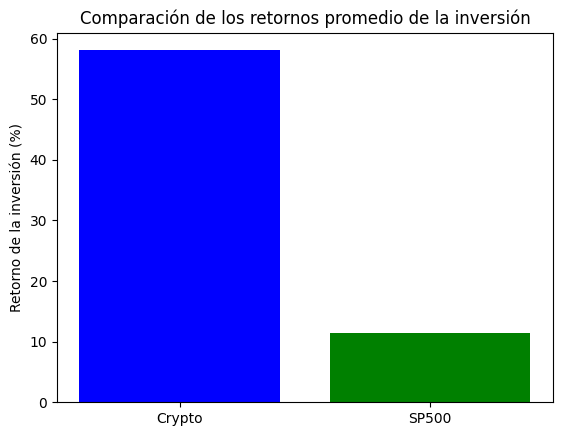

In [14]:
# Gráfica de los retornos
returns = [avg_crypto_return * 100, avg_sp500_return * 100]
portfolios = ['Crypto', 'SP500']

plt.bar(portfolios, returns, color=['blue', 'green'])
plt.ylabel('Retorno de la inversión (%)')
plt.title('Comparación de los retornos promedio de la inversión')
plt.show()


#Esta gráfica muestra una comparación visual de los retornos promedio de la inversión en criptomonedas y en SP500. Recuerda que estos son los retornos promedios de las simulaciones, no los retornos reales. Los retornos reales pueden variar significativamente.

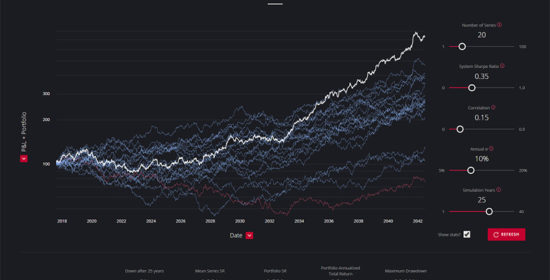

#En este proyecto, hemos demostrado el uso de la simulación de Monte Carlo, una poderosa técnica de modelado cuantitativo, en el análisis y la gestión de portafolios de criptomonedas. Hemos discutido los fundamentos teóricos detrás de la simulación de Monte Carlo, incluyendo la generación de caminos de precios aleatorios y el análisis de la distribución resultante de los rendimientos.

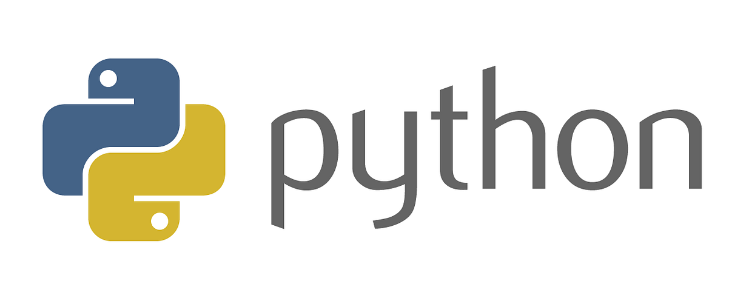

#A través de la codificación en Python, se descargaron los precios históricos de Bitcoin, Ethereum y Cardano y se llevaron a cabo cálculos para generar miles de escenarios de precios futuros para cada criptomoneda. Esto nos permitió visualizar la variabilidad y la incertidumbre asociadas con el rendimiento de estas criptomonedas, proporcionando una comprensión más matizada de su riesgo en comparación con las métricas estándar de volatilidad.

#También comparamos los posibles resultados de nuestro portafolio de criptomonedas con una inversión en un activo más seguro, el índice S&P 500. Este análisis nos permitió ver el rendimiento de nuestra inversión en un contexto más amplio y entender el nivel de riesgo que asumimos al invertir en criptomonedas.

#Es importante tener en cuenta que, aunque la simulación de Monte Carlo es una herramienta poderosa para el análisis de riesgos, no es infalible. Los modelos de simulación de Monte Carlo, como el que hemos desarrollado aquí, dependen de supuestos y estimaciones y pueden no reflejar con precisión la realidad. Además, la rentabilidad pasada no garantiza la rentabilidad futura.

#Este proyecto sirve como una demostración de cómo se puede utilizar la simulación de Monte Carlo en la gestión de riesgos financieros. Aunque se enfocó en las criptomonedas, los principios y las técnicas discutidos son aplicables a una amplia gama de instrumentos financieros. Sin embargo, debe enfatizarse que este trabajo no debe ser utilizado para tomar decisiones de inversión reales sin el asesoramiento adecuado de un profesional financiero.

#Por último, este proyecto también destaca la importancia y la utilidad de la programación en Python y otras habilidades técnicas en el campo financiero. Los analistas que son capaces de aprovechar estas habilidades pueden obtener perspectivas más profundas y realizar análisis más rigurosos que los que sólo utilizan herramientas tradicionales.